In [1]:
from MultiTrackingSystem import MultiTrackingSystem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.animation as animation
import IPython.display as display


In [2]:
alpha = np.pi * (0.2)/180
beta = 12
corr = np.sin(alpha/2) * 2
min_sample_1 = 19657
min_sample_2 = -2.138
min_sample_3 = -100

In [ ]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/USA pkwy')
file_path  = os.listdir()[4]
multi_tracking = MultiTrackingSystem(iter_n = 1800, tolerance= 4,gen_fig= True)
multi_tracking.fit_adbgen_pcap(file_path,beta,min_sample_1,min_sample_2,min_sample_3)
multi_tracking.batch_tracking()
multi_tracking.svae_gif('USA pkwy')

In [3]:
os.chdir(r'/Users/czhui960/Documents/Lidar/to ZHIHUI/USA pkwy')
file_path  = os.listdir()[4]
multi_tracking = MultiTrackingSystem(iter_n = 1800, tolerance= 4,gen_fig= False)
multi_tracking.fit_adbgen_pcap(file_path,beta,min_sample_1,min_sample_2,min_sample_3)
multi_tracking.batch_tracking()

100%|██████████| 1799/1799 [02:11<00:00, 13.69it/s]


In [11]:
multi_tracking.out_of_tracking_list[0].elevation_intensities[3]

array([[-0.5968616 , 31.        ],
       [-0.5945334 , 31.        ],
       [-0.55965674, 29.        ],
       [-0.5588186 , 29.        ],
       [-0.5583529 , 29.        ],
       [-0.55821323, 29.        ],
       [-0.5572819 , 29.        ],
       [-0.5596101 , 29.        ],
       [-0.56328875, 29.        ],
       [-0.5654307 , 29.        ],
       [-1.1233305 , 28.        ],
       [-1.1210042 , 27.        ],
       [-1.1344968 , 28.        ],
       [-0.8805088 , 30.        ],
       [-0.87073547, 29.        ],
       [-0.8644526 , 29.        ],
       [-0.8553773 , 28.        ],
       [-0.84588325, 27.        ],
       [-0.84225315, 27.        ],
       [-0.83443445, 26.        ],
       [-0.83492315, 26.        ],
       [-0.8363891 , 26.        ],
       [-0.83722687, 26.        ],
       [-0.8389023 , 26.        ],
       [-0.83987963, 26.        ],
       [-0.8406475 , 26.        ]], dtype=float32)

In [18]:
import cv2

In [48]:
point_clouds = multi_tracking.out_of_tracking_list[4].point_clouds

In [125]:
def show_cur_traj(point_clouds):
    fig,ax = plt.subplots(1,figsize = (10,10))
    plt.figure(figsize=(10,10))
    for i in range(len(point_clouds)):
        if type(point_clouds[i]) != int:
            ax.scatter(point_clouds[i][:,0],point_clouds[i][:,1],s = 3)
            bounding_rect = cv2.boundingRect(point_clouds[i])
            ax.add_patch(patches.Rectangle((bounding_rect[0], bounding_rect[1]), bounding_rect[2], bounding_rect[3],fill = False,color = 'r'))       
    plt.show()

In [126]:
def show_four_frame_traj(point_clouds,index):
    fig,ax = plt.subplots(1,figsize = (10,10))
    start = index - 4
    end = index + 4 
    if start < 0 : 
        start = 0
    if end > (len(point_clouds) - 1):
        end = len(point_clouds) - 1
    for i in range(start,end):
        if type(point_clouds[i]) != int:
            ax.scatter(point_clouds[i][:,0],point_clouds[i][:,1],s = 3)
            if i == index:
                bounding_rect = cv2.boundingRect(point_clouds[i])
                ax.add_patch(patches.Rectangle((bounding_rect[0], bounding_rect[1]), bounding_rect[2], bounding_rect[3],fill = False,color = 'r'))   
                plt.text(bounding_rect[0],bounding_rect[1]+bounding_rect[3],'{}'.format(i),fontsize = 20)
    plt.show()
    


In [130]:
def is_input_correct(cur_input):
    if cur_input == 'y' or cur_input == 'Y' or cur_input == 'n' or cur_input == 'N':
        return True
    else:
        return False

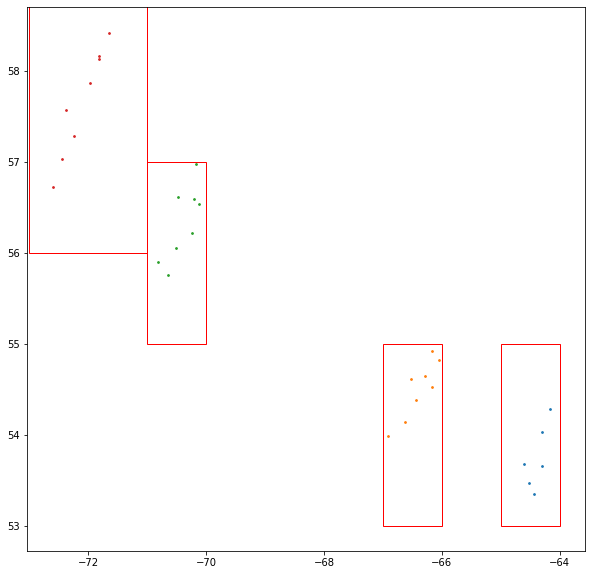

<Figure size 720x720 with 0 Axes>

In [135]:
cur_object_ind = 0 
processed_point_clouds_num = 0
comfirmed_samples = []
labels = [] # 0: car, 1: horse, 2:noise
while True:
    point_clouds = multi_tracking.out_of_tracking_list[cur_object_ind].point_clouds
    show_cur_traj(point_clouds)
    cur_input = input('Save All Trackings?:')
    display.clear_output(wait=True)
    correct_input = is_input_correct(cur_input)
    if cur_input == 'exit':
        break
    while correct_input:
        correct_input = is_input_correct(cur_input)
        print('Wrong Input')
        if correct_input:
            break
    if cur_input == 'y' or cur_input == 'Y':
        added_samples = 0
        for i in range(len(point_clouds)):
            if type(point_clouds[i]) != int:
                comfirmed_samples.append(point_clouds[i])
                added_samples += 1
        processed_point_clouds_num += added_samples
    else:
        for i in range(len(point_clouds)):
            if type(point_clouds[i]) != int:
                show_four_frame_traj(point_clouds,i)
                cur_input = input('Save the Labelled Tracking?:')
                if cur_input == 'exit':
                    break
                display.clear_output(wait=True)
                while correct_input:
                    correct_input = is_input_correct(cur_input)
                    print('Wrong Input')
                    if correct_input:
                        break
                if cur_input == 'y' or cur_input == 'Y':
                    comfirmed_samples.append(point_clouds[i])
                    processed_point_clouds_num += 1
    plt.close()
    cur_object_ind+=1
    display.clear_output(wait=True)

                
                


        